
# Modelando Doenças Infecciosas
## Entendendo Epidemias como uma Reação Química

A modelagem do espalhamento de doenças infecciosas ou epidemias começou clássicamente como extensão dos princípios empregados na modelagem de reações químicas. Assumindo uma população "bem misturada", ou seja, em que a probabilidade de encontro entre qualquer par de indivíduos é igual. 

Tais populações são então divididas em classes imunológicas, e a partir da interação entre indivíduos pertencentes a estas classes, a dinâmica se origina.
## O modelo SI

No modelo SI temos apenas duas classes de indivíduos, os saudáveis, mas **suscetíveis** a contrair uma doença, e os que já foram **infectados** pela doença e pode portanto, espalhá-la por meio do contato direto. Note que nem todas as doenças se transmitem desta forma, mas neste modelo inicial vamos considerar que sim. O indivíduos transitam entre estes dois estados por meio de eventos de infecção ($S\rightarrow I$) e recuperação ($I\rightarrow S$)

$$S\leftrightharpoons_{\beta}^{\gamma}I$$

em termos de "reações" temos:

$$S+I\,\, \rightarrow \,\, 2I$$

$$I \rightarrow S$$
### Escrevendo as Equações

Novamente lançaremos mão da lei de ação de massas e do fato de que o sistema é fechado, ou seja o número de indivíduos não varia.

$$\frac{dS}{dt}= \gamma I -\beta S I$$

$$\frac{dI}{dt}= \beta SI - \gamma I$$

Utilizamos ps parâmetros $\beta$ e $\gamma$ para representar as taxas de infecção e recuperação, respectivamente.
## Exercícios:

1. Mostre que a população total é conservada no modelo SI.



In [2]:
%display typeset

2. O Modelo SI apresentado acima poderia ser simplificado para uma única equação diferencial? Se sim, escreva esta equação.

## Aplicando Análise Dimensional ao Modelo

Vamos adotar as unidades de tempo em dias. Logo, o lado esquerdo das equações terá unidades de \[número de pessoas\]/\[dias\]. Logo, concluímos que $\gamma$ possui unidades dias$^{-1}$ enquanto $\beta$ tem unidades de pessoas$^{-1} \times$ dias$^{-1}$, ou seja, é uma taxa de infecção per capita. 
#### Exercício 3:

Dada a análise dimensional acima, que parâmetros (ou combinação de parâmetros) carrega a informação sobre a estala de tempo? e qual seria uma escala de tempo adequada para descrever os eventos descritos pelo modelo?
### Adimensionalizando o modelo

Seja $x^*(t)$ a fração da população no estado infeccioso e  $y^*(t)$ a fração da população total suscetível no tempo $t$. Vamos assumir que estas variáveis adimensionais somam $1$, ou seja, $x^* + y^* = 1$. temos então:

$$y^* = \frac{S}{N},$$

$$x^* = \frac{I}{N},$$

$$t^* = \frac{t}{1/\gamma} = \gamma t.$$

se $S(t) +I(t) = N,$ então:

$$\frac{S}{N}+\frac{I}{N}=y^* + x^* = \frac{N}{N} = 1.$$

Agora podemos substituir as novas variáveis adimensionais no modelo e obter:

$$\frac{d(y^* N)}{d(t^*/\gamma)} = \gamma x^* N - \beta (y^*N)(x^* N)$$

$$\frac{d(x^* N)}{d(t^*/\gamma)} = \beta(y^* N)(x^* N) - -\gamma x^* N$$

Cancelando os fatores comuns $N$ e $\gamma$ em ambos os lados das duas equações, chegamos a:

$$\frac{dy^*}{dt^*} =  x^*  - \left(\frac{\beta N}{\gamma}\right)x^*y^*$$

$$\frac{dx^*}{dt^*} =  \left(\frac{\beta N}{\gamma}\right) x^*y^* -  x^* $$

Agora podemos notar que restou uma razão de parâmetros que vamos denotar por $R_0 = \frac{\beta N}{\gamma}$. Este novo parâmetro é muito importante e controla completamente o comportamento qualitativo do modelo, como veremos mais adiante. Por ora, vamos re-escrever o modelo em trmos do $R_0$ e deixar de lado as $*$:

$$\frac{dy}{dt} =  x  - R_0 xy$$

$$\frac{dx}{dt} = R_0 xy -  x $$

Se repetirmos o processo de adimensionalização para o modelo reduzido a uma única equação, derivado no exercício 2, acima, chegamos à seguinte equação:

$$\frac{dx}{dt} =  \left(\frac{\beta N}{\gamma}\right) (1-x)x-x $$

ou, em termos do R_0:

$$\frac{dx}{dt} = R_0 (1-x)x-x $$
#### Exercício 4:

Considere que $1/\gamma$ é o tempo típico de recuperação, o que significa o tempo em que a pessoa está doente e pode transmitir a doença para outros. Suponha que inicialmente tenhamos uma única pessoa infectada em uma população de $N$ indivíduos suscetíveis (para $N$ grande $N-1 \approx N$). Explique o significado de R_0 para a dinâmica da epidemia.



## Analisando o Modelo

Agora que temos o modelo construído e devidamente simplificado, pessemos à sua análise aplicando as ferramentas que já conhecemos.
### Encontrando os Equilíbrios

Vamos partir do modelo reduzido a uma equação, expresso em tremo do $R_0$. Lembre-se que os equilíbrios devem satisfazer $dx/dt=0$.
#### Exercício 5

Encontre os equilíbrios, se estes existirem, e interprete os resultados.


In [2]:
var('R_0')
f(x) = R_0*(1-x)*x-x
solve(f,x)

[x == (R_0 - 1)/R_0, x == 0]



O equilíbrio em que $x$, nosso número de infectados é 0, é chamado de equilíbrio livre de doença, e neste caso $y=1$.
#### Exercício 6:

No caso em que $x=(R_0-1)/R_0$, qual o valor de $y$?


In [3]:
var('y')
x=(R_0-1)/R_0
pretty_print(html('se'))
show('x=',expand(x))
y=1-x
pretty_print(html('então $y$ no "equilíbrio endêmico" torna-se:'))
pretty_print(expand(y));

se

'x=' -1/R_0 + 1

então <script type="math/tex">y</script> no "equilíbrio endêmico" torna-se:

1/R_0



É importante notar também que o "equilíbrio endêmico" só faz sentido, biologicamente falando, se $x>0$, logo $R_0$ também precisa ser maior que 1. O que nos leva ao seguinte teorema:
#### Teorema:

Em um modelo SI, uma doença só pode tornar-se endêmica, se $R_0>1$, onde $R_0$ é o numero reprodutivo básico da doença, $R_0=\beta N/\gamma$.



## Comportamento Qualitativo

Para aplicar nosso inspeção gráfica dos equilíbrios do sistema, precisamos plotar $f(x) = dx/dt$


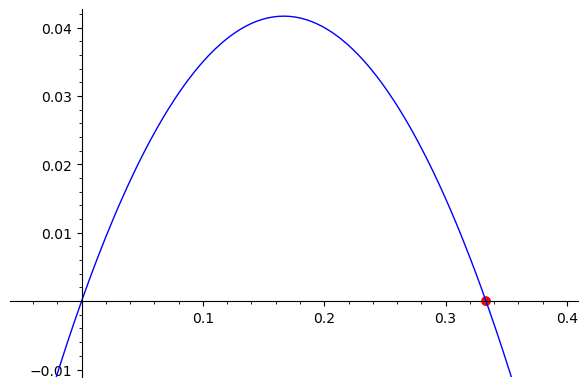

In [6]:
pl = plot(f(R_0=1.5),(x,-0.05,0.4),ymin=-0.01)
e1 = point((1-1/1.5,0),size=50,color='red') # 1-1/R_0
show(pl+e1)

### Simulações

In [7]:
def fun(t,x, p):
    R_0=p[0]
    x=x[0]
    return [R_0*(1-x)*x-x]

In [19]:
T=ode_solver()
T.function = fun
t_span = [0,20]
ic = [1e-4]
r0 = 2
T.ode_solve(t_span,ic,num_points=100, params=[r0])

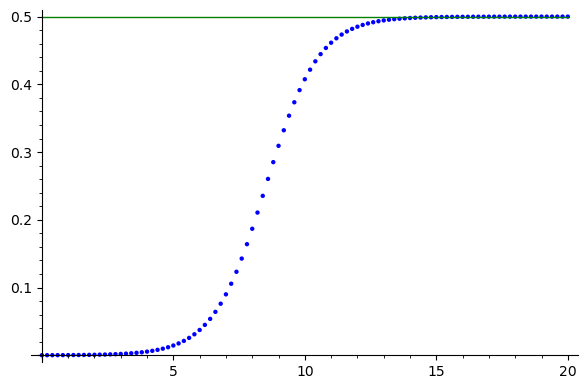

In [20]:
sol = list_plot([(i[0],i[1][0]) for i in T.solution])
ee = plot(1-(1/r0),(x,0,20),color='green')
sol+ee


### Bifurcações

Com vimos acima, o valor de $R_0=1$ parece ser um ponto de bifurcação para este modelo dada a alteração na natureza dos seus equilíbrios. Vamos construir um diagrama de bifurcações em função de $R_0$:


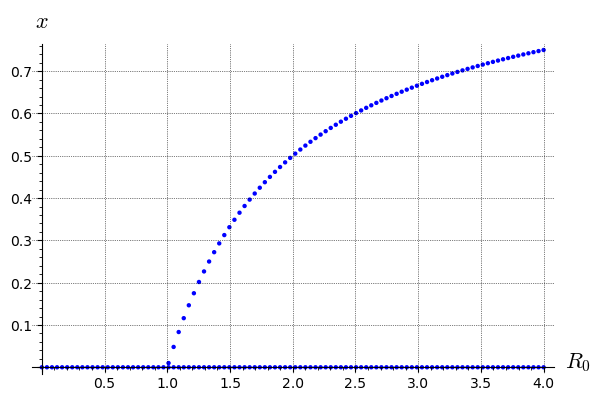

In [21]:
import numpy as np
def drawbif(func,l,u):
    pts = []
    for v in np.linspace(l,u,100):
        g = func(R_0=v)
        xvals = solve(g,x)
        pts.extend([[v,n(i.rhs().real_part())] for i in xvals if n(i.rhs().real_part())>=0])
    
    show(points(pts),axes_labels=['$R_0$','$x$'],gridlines=True, xmin=0)
var('R_0')
f(x) = R_0*(1-x)*x - x
drawbif(f,0,4)


#### Exercício 7:

Interprete a bifurcação acima e diga que tipo de bifurcação dentre as estudadas nós observamos acima



## O Modelo SIR

Se extendermos o cenário epidemico que deu origem ao modelo SI, com a introdução da possibilidade dos indíviduos acometidos pela doença tornarem-se imunes à doença, obtemos outro modelo epidemiológico clássico, o modelo SIR., que pode ser descrito por meio do seguinte sistema de EDOs:

$$\frac{dS}{dt} = - \beta I S$$

$$ \frac{dI}{dt} = \beta I S - \gamma I $$

$$\frac{dR}{dt} = \gamma I$$
#### Exercício 8:

Interprete as equações acima e esboçe um diagrama de blocos para o modelo SIR


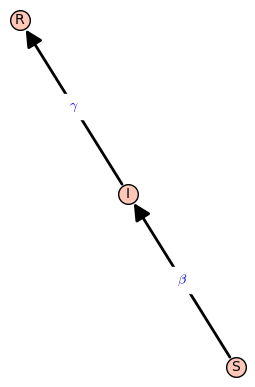

In [36]:
#Podemos usar o suporte do sage a grafos para desenhar o diagrama
var('S I R beta gamma')
Modelo = DiGraph({S:{I: r'$\beta$'}, I:{R:r'$\gamma$'}, R: {}})
Modelo.show(edge_labels=True)


#### Exercício 9:

Explique porque o modelo acima pode ser estudado como um sistema de apenas duas variáveis. Qual variável não encontra-se acoplada às outras duas?
#### Exercício 9.5: 

Analise o modelo SIR com apenas as duas primeiras equações de forma similar ao que foi feito como o modelo SI. Encontre a expressão do $R_0$ para este modelo, e os valores de $S_{\infty}$ e $I_{\infty}$  no equilíbnrio endêmico.
#### Exercício 10:

Divida $dI/dt$ por $dS/dt$ e simplifique a equação para obter uma EDO para I em função de S. Resolva a equação, obtendo a seguinte solução: $I(S)=-S+\frac{\gamma}{\beta}ln S + K$,  plote a solução e interprete.


In [14]:
var('beta I S gamma t')
S = function('S')(t)
I = function('I')(t)
dsdt = diff(S,t) == -beta*I*S
didt = diff(I,t) == beta*I*S - gamma*I
dids = didt/dsdt
show(dids)
pretty_print(html("Agora vamos simplificar esta equação:"))
dids2 = simplify(expand(dids))
show(dids2)

diff(I(t), t)/diff(S(t), t) == -(beta*I(t)*S(t) - gamma*I(t))/(beta*I(t)*S(t))

Agora vamos simplificar esta equação:

diff(_I(t), t)/diff(S(t), t) == gamma/(beta*S(t)) - 1

Agora podemos resolver facilmente a equação simplificada:

In [15]:
sol = integrate(dids2,S)
sol

_I(t) == c1 + gamma*log(S(t))/beta - S(t)

E, após atribuir valores a $\gamma$ e $\beta$ podemos plotar a solução e interpretá-la

In [24]:
gamma=0.3
beta = .5

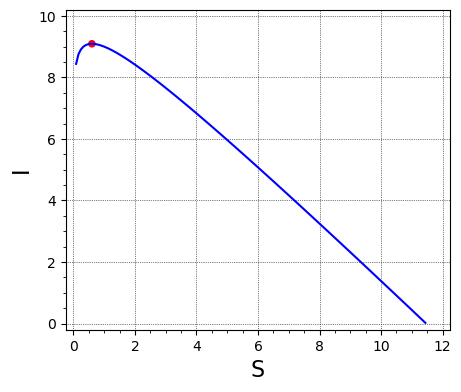

In [25]:
var('S I')
ip = implicit_plot(S+I-gamma/beta*log(S)-10, (S,0,12), (I,0,10), gridlines=True, axes_labels=["S","I"])
p = point([gamma/beta, (-S+gamma/beta*log(S)+10).subs(S=gamma/beta)], color='red', pointsize=30 )
show(ip+p)

A partir desta função, podemos encontrar o número máximo de infectados, $I_{max}$ em uma epidemia. Ele ocorre quando $S=\frac{\gamma}{\beta}$.

In [26]:
var('gamma beta')
f=diff(S+I-gamma/beta*log(S)-10, S)
solve(f,S)

[S == gamma/beta]

In [27]:
solve(S+0-gamma/beta*log(S)-10, S)

[S == (gamma*log(S) + 10*beta)/beta]



A partir de um exame rápido da orbita obtida pelo gráfico implícito acima, vemos que ela nunca alcança o eixo do $I$, ou seja, $S$ sempre será positivo. Isto significa que uma fração da população sempre escapará da epidemia.
#### Exercício 11:

Fazer a Análise dimensional da Solução $I(t, S)$ encontrando a dimensão da constante e sua interpretação epidemiológica.
### Simulando o Modelo SIR

Podemos também explorar o modelo por meio de simulações noméricas


In [22]:
def fun (t,y, pars):
    S,I,R = y
    N=501
    beta, mu = pars
    return [-beta*I*S/N, 
            beta*I*S/N - mu*I,
            mu*I
            ]

In [30]:
T = ode_solver()
T.function = fun
inits = 500,1, 0
tspan = [0,80]
T.ode_solve(tspan, inits, num_points=500, params=[.5,.09])

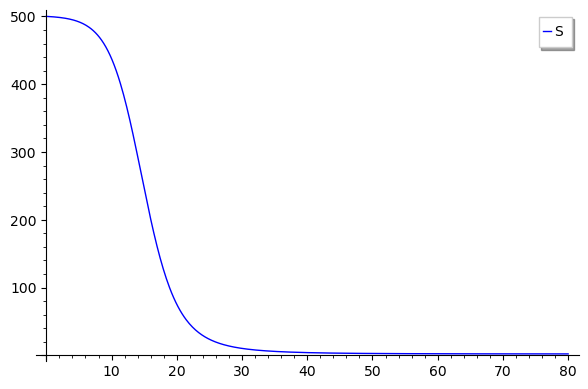

In [31]:
T.plot_solution(0,interpolate=True, legend_label='S')

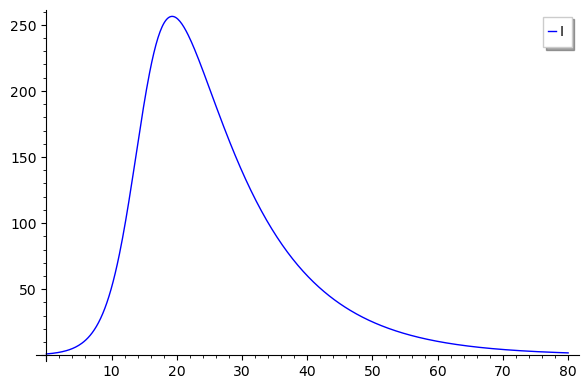

In [32]:
T.plot_solution(1,interpolate=True, legend_label='I')

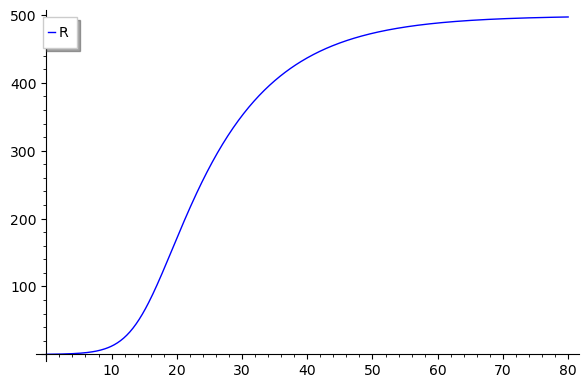

In [33]:
T.plot_solution(2,interpolate=True, legend_label='R')


### Analisando o final da Epidemia

Será que os suscetíveis são necessáriamente consumidos completamente durante uma epidemia?

Para tentar responder a esta pergunta, podemos dividir a 1ª equação do modelo SIR pela 3ª.

A partir de agora vamos interpretar os nossas variáveis $S$, $I$, $R$ como Frações de N, ou seja, $S/N$, $I/N$, $R/N$, Isto faz com que a nossa expressão para $R_0$ se reduza a $\beta/\gamma$, assumindo $S \approx N = 1$.


In [34]:
var('beta gamma S I R t')
S = function('S')(t)
R = function('R')(t)
f1 = diff(S,t) == -beta*S*I
f2 = diff(R,t) == gamma*I
f1/f2

diff(S(t), t)/diff(R(t), t) == -beta*S(t)/gamma



Podemos então reescrever a equação obtida acima como

$$\frac{dS}{dR}==R_0 S$$


In [35]:
f3 = f1/f2


pretty_print(html("Resolvendo a equação, obtemos"))

var ('beta X gamma Y R_0 S_0')
X = function('X')( Y)
solution = desolve(diff(X,Y)== -R_0*X, X, ivar=Y)
solution

Resolvendo a equação, obtemos

_C*e^(-R_0*Y)

Onde $C$ é $S_0$

In [36]:
solution.subs(_C=S_0)

S_0*e^(-R_0*Y)

In [37]:
solution.subs(_C=S_0, R_0=beta*S_0/gamma)

S_0*e^(-S_0*Y*beta/gamma)

In [40]:
var('x')
gamma=0.09
beta = .001
s0 = 100
pretty_print(html("$R_0={}$".format(beta*s0/mu)))
plot(s0*exp(-beta*s0*x/mu), (x, 0,10),axes_labels=["R","S"])

<script type="math/tex">R_0=0.100000000000000/mu</script>

ValueError: Variable 'mu' not found

In [7]:
f(S,I) = -beta*I*S
g(I,S) = beta*I*S - gamma*I
IN = plot3d(g(beta=0.008,gamma=0.1),(S,0,200),(I,0,500),alpha=.5, color="red")
SN = plot3d(f(beta=0.008,gamma=0.1),(S,0,200),(I,0,500))
show(IN+SN)

Graphics3d Object

### Examinando a estabilidade do ELD no modelo SIR

In [41]:
var('beta I S gamma t')
solve([-beta*I*S,beta*I*S - gamma*I],[S,I])

[[S == r2, I == 0]]

In [42]:
var('beta I S gamma t')
jack = jacobian([-beta*I*S,beta*I*S - gamma*I],[S,I])
show(jack)

[       -I*beta        -S*beta]
[        I*beta S*beta - gamma]

In [10]:
jack(beta=0.2, gamma=0.1, S=100, I=0).eigenvalues()

[199/10, 0]

## O Modelo SEIS

Vamos considerar uma extensão do Modelo SI, no qual os indivíduos infectados não se tornam imediatamente infecciosos, mas passam por um período de incubação

$$\frac{dS}{dT}=B-\beta SI-\mu S+\gamma I$$

$$\frac{dE}{dT}=\beta SI-(\epsilon +\mu )E$$

$$\frac{dI}{dT}=\varepsilon E-(\gamma +\mu )I$$

In [45]:
var('beta B N E I S gamma epsilon mu t')
dsdt = B -beta*I*S -mu*S +gamma*I
dedt = beta*I*S - (epsilon+mu)*E
didt = epsilon*E-(gamma+mu)*I
(dsdt+dedt+didt).simplify()

-E*(epsilon + mu) + E*epsilon - I*(gamma + mu) + I*gamma - S*mu + B

$B=\mu(S+E+I)$, logo $B=\mu N$

In [63]:
eqs = solve([dsdt,dedt, didt ],[S,E,I])
eqs

[[S == (epsilon*gamma + (epsilon + gamma)*mu + mu^2)/(beta*epsilon), E == (B*beta*epsilon*gamma - (epsilon + 2*gamma)*mu^3 - mu^4 - (2*epsilon*gamma + gamma^2)*mu^2 + (B*beta*epsilon - epsilon*gamma^2)*mu)/(beta*epsilon*mu^2 + (beta*epsilon^2 + beta*epsilon*gamma)*mu), I == (B*beta*epsilon - epsilon*gamma*mu - (epsilon + gamma)*mu^2 - mu^3)/(beta*mu^2 + (beta*epsilon + beta*gamma)*mu)], [S == B/mu, E == 0, I == 0]]

In [53]:
def seis(t, y, pars):
    S,E,I = y
    beta,B,gamma,epsilon,mu = pars
    return B -beta*I*S -mu*S +gamma*I,beta*I*S - (epsilon+mu)*E,epsilon*E-(gamma+mu)*I

In [54]:
seis(0,inits,[.5,0.01,0.09, 0.1,0.01])

(9.99999999999959e-6, -0.000110000000000000, 0.000100000000000000)

In [59]:
T = ode_solver()
T.function = seis
inits = 0.999,.001, 0
tspan = [0,80]
T.ode_solve(tspan, inits, num_points=500, params=[.9,0.01,0.09, 0.1,0.01])

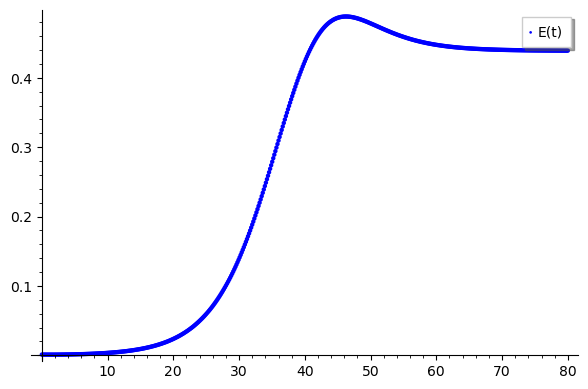

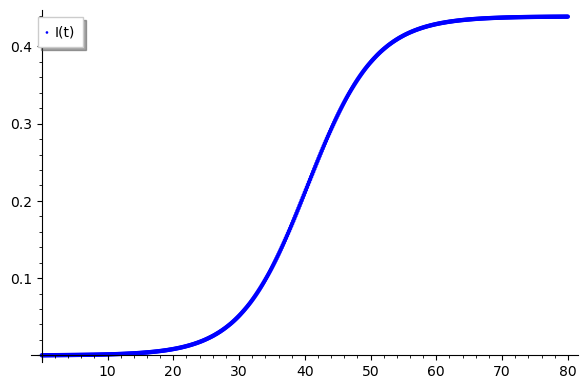

In [60]:
T.plot_solution(1, legend_label='E(t)')
T.plot_solution(2, legend_label='I(t)')

In [61]:
J = jacobian([dsdt,dedt,didt],[S,E,I])
J

[   -I*beta - mu               0 -S*beta + gamma]
[         I*beta   -epsilon - mu          S*beta]
[              0         epsilon     -gamma - mu]

In [65]:
autov = J.subs({S:eqs[0][0].rhs(),I:eqs[0][2].rhs()}).eigenvalues()
autov

[-1/2*(B*beta*epsilon + 2*(epsilon + gamma)*mu^2 + mu^3 + (epsilon^2 + epsilon*gamma + gamma^2)*mu + sqrt(B^2*beta^2*epsilon^2 + 16*(epsilon + gamma)*mu^5 + 5*mu^6 + 2*(9*epsilon^2 + 19*epsilon*gamma + 9*gamma^2)*mu^4 - 2*(B*beta*epsilon - 4*epsilon^3 - 14*epsilon^2*gamma - 14*epsilon*gamma^2 - 4*gamma^3)*mu^3 - (4*B*beta*epsilon^2 - epsilon^4 - 11*epsilon^2*gamma^2 - 6*epsilon*gamma^3 - gamma^4 + 2*(2*B*beta*epsilon - 3*epsilon^3)*gamma)*mu^2 - 2*(B*beta*epsilon^3 + 3*B*beta*epsilon^2*gamma + B*beta*epsilon*gamma^2)*mu))/((epsilon + gamma)*mu + mu^2),
 -1/2*(B*beta*epsilon + 2*(epsilon + gamma)*mu^2 + mu^3 + (epsilon^2 + epsilon*gamma + gamma^2)*mu - sqrt(B^2*beta^2*epsilon^2 + 16*(epsilon + gamma)*mu^5 + 5*mu^6 + 2*(9*epsilon^2 + 19*epsilon*gamma + 9*gamma^2)*mu^4 - 2*(B*beta*epsilon - 4*epsilon^3 - 14*epsilon^2*gamma - 14*epsilon*gamma^2 - 4*gamma^3)*mu^3 - (4*B*beta*epsilon^2 - epsilon^4 - 11*epsilon^2*gamma^2 - 6*epsilon*gamma^3 - gamma^4 + 2*(2*B*beta*epsilon - 3*epsilon^3)*gamma)*mu^2 - 2*(B*beta*epsilon^3 + 3*B*beta*epsilon^2*gamma + B*beta*epsilon*gamma^2)*mu))/((epsilon + gamma)*mu + mu^2),
 -mu]

In [66]:
for av in autov:
    show(av.subs({beta:.9,B:.01,epsilon:.1,gamma:.09,mu:.01}))

-0.414331346231725

-0.190668653768275

-0.0100000000000000

## O modelo SEIR 

Outra variação onde adicionamos a imunidade permanente ao SEIS:

$$\frac{dS}{dT}=B-\beta SI-\mu S$$

$$\frac{dE}{dT}=\beta SI-(\epsilon +\mu )E$$

$$\frac{dI}{dT}=\varepsilon E-(\gamma +\mu )I$$

$$\frac {dR}{dT}=\gamma I-\mu R$$